In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
 df.duplicated().sum()

0

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [9]:
print(df['Release_Date'].dtypes)

datetime64[ns]


In [10]:
df.dtypes
print(df.columns.tolist())

['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url']


In [11]:
df['Release_Date']=df['Release_Date'].dt.year

In [12]:
df['Release_Date'].head()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32

Dropping the columns

In [13]:
print(df.columns.tolist())

['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url']


In [14]:
cols=['Overview','Original_Language','Poster_Url']

In [15]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#### Categorizing Vote_Average Columns
 we weould cut the Vote_average values and make 4 catogories popular average below_avg not_popular to describe it more using catigorize_col() function provided above

In [17]:
def catigorize_col(df,cols,labels):
    edges=[df[cols].describe()['min'],
           df[cols].describe()['25%'],
           df[cols].describe()['50%'],
           df[cols].describe()['75%'],
           df[cols].describe()['max']]

    df[cols]=pd.cut(df[cols],edges,labels=labels,duplicates='drop')
    return df

In [18]:
labels=['not_popular','below_avg','average','popular']

In [19]:
catigorize_col(df,'Vote_Average',labels)

df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [21]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [22]:
df.value_counts()

Release_Date  Title                              Popularity  Vote_Count  Vote_Average  Genre                              
1902          A Trip to the Moon                 18.356      1284        popular       Adventure, Fantasy, Science Fiction    1
2016          Before the Flood                   23.114      659         popular       Documentary                            1
              Beta Test                          14.396      152         not_popular   Thriller, Action, Science Fiction      1
              Beware the Slenderman              14.999      185         below_avg     Crime, Documentary                     1
              Big Fish & Begonia                 34.030      330         popular       Animation, Adventure, Fantasy          1
                                                                                                                             ..
2005          Diary of a Mad Black Woman         22.993      161         below_avg     Comedy, Drama, Romance

In [23]:
df.isna().sum

<bound method DataFrame.sum of       Release_Date  Title  Popularity  Vote_Count  Vote_Average  Genre
0            False  False       False       False         False  False
1            False  False       False       False         False  False
2            False  False       False       False         False  False
3            False  False       False       False         False  False
4            False  False       False       False         False  False
...            ...    ...         ...         ...           ...    ...
9822         False  False       False       False         False  False
9823         False  False       False       False         False  False
9824         False  False       False       False         False  False
9825         False  False       False       False         False  False
9826         False  False       False       False         False  False

[9827 rows x 6 columns]>

In [24]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [25]:
df.dropna(inplace=True)

### We'd split into a list and then explode our dataframe to have only one genre per row for each movie

In [26]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [31]:
df['Genre'].value_counts()


Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1426
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

### Casting column into category

In [32]:
df['Genre']=df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [33]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visulaization 

In [34]:
sns.set_style('whitegrid')

### What is the most frequent genre of movies released on netflix

In [35]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

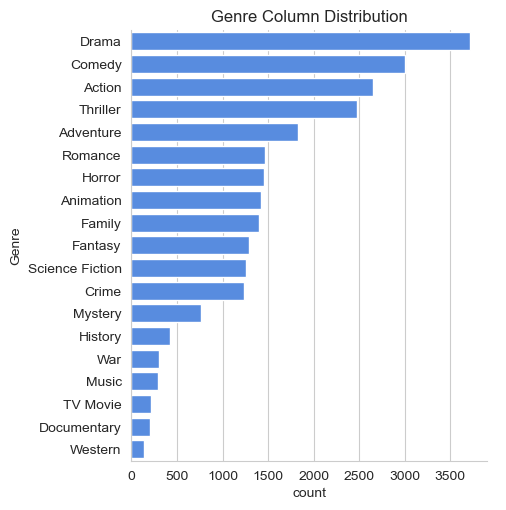

In [36]:
sns.catplot(y='Genre' ,data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title("Genre Column Distribution")
plt.show()

### Which has the highest votes in vote avg column?

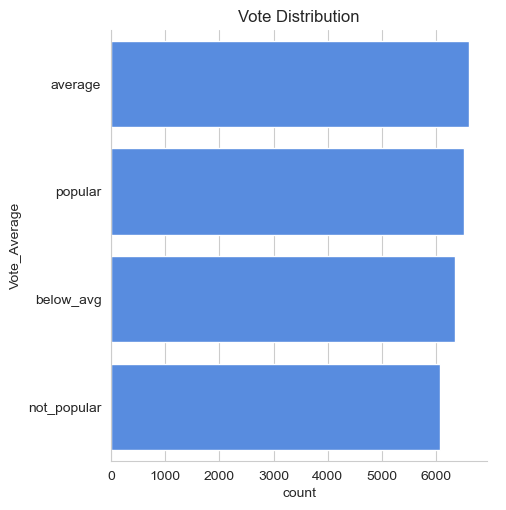

In [43]:
sns.catplot(y='Vote_Average' ,data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title("Vote Distribution")
plt.show()

### What movie has got higesh popularity? What's its genre?

In [44]:
df.head(3)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [49]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [50]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### Which Year has the most filmed movies?

Text(0.5, 1.0, 'Release Date')

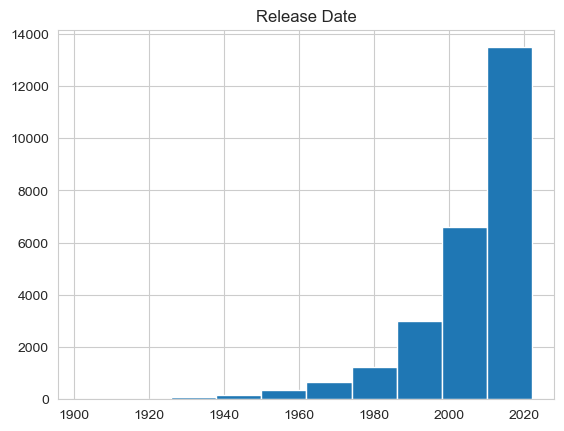

In [52]:
df['Release_Date'].hist()
plt.title("Release Date")